In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib_venn import venn3 
from shutil import copyfile

sgd = pd.read_csv("SGD_features.tab",header=None,sep='\t')

def toSGD(standard):
    row = sgd[(sgd[3] == standard)]
    if (len(row)>0):
        return row[0].tolist()[0]
    else:
        return ""

In [2]:
TF = "HSF1"

ys = pd.read_csv("yeastract2019-flat-file.tsv",header=None,sep='\t')
ys.columns = ["TF", "TFS", "Target", "TargetS","ID","Date","Conditions","Type","Evidence","Experiment"]
filtered = ys[(ys.TFS == TF)]
filtered = filtered[(filtered.Conditions == "Stress")]
positive = filtered[(filtered.Type == "Positive")]
negative = filtered[(filtered.Type == "Negative")]


print("{} positive regulatory associations with ".format(len(positive)) + TF)

positive = positive.groupby(["Target"]).count()
print("{} positive regulated factors ".format(len(positive)) + TF)
positive = positive.TF

pos_hsf1 =[]
for index, row in positive.iteritems():
    pos_hsf1.append(index)
    #print(index)

print("{} negative regulatory associations with ".format(len(negative)) + TF)
negative = negative.groupby(["Target"]).count()
print("{} negative regulated factors ".format(len(negative)) + TF)
negative = negative.TF

for index, row in negative.iteritems():
    
    pass#print(toSGD(index))

865 positive regulatory associations with HSF1
544 positive regulated factors HSF1
4 negative regulatory associations with HSF1
4 negative regulated factors HSF1


In [3]:
TF = "MSN2"

ys = pd.read_csv("yeastract2019-flat-file.tsv",header=None,sep='\t')
ys.columns = ["TF", "TFS", "Target", "TargetS","ID","Date","Conditions","Type","Evidence","Experiment"]
filtered = ys[(ys.TFS == TF)]
filtered = filtered[(filtered.Conditions == "Stress")]
positive = filtered[(filtered.Type == "Positive")]
negative = filtered[(filtered.Type == "Negative")]


print("{} positive regulatory associations with ".format(len(positive)) + TF)

positive = positive.groupby(["Target"]).count()
print("{} positive regulated factors ".format(len(positive)) + TF)
positive = positive.TF

pos_msn2 = []
for index, row in positive.iteritems():
    pos_msn2.append(index)
    pass#print(toSGD(index))

print("{} negative regulatory associations with ".format(len(negative)) + TF)
negative = negative.groupby(["Target"]).count()
print("{} negative regulated factors ".format(len(negative)) + TF)
negative = negative.TF

for index, row in negative.iteritems():
    
    pass#print(toSGD(index))


1527 positive regulatory associations with MSN2
854 positive regulated factors MSN2
475 negative regulatory associations with MSN2
382 negative regulated factors MSN2


In [4]:
TF = "MSN4"

ys = pd.read_csv("yeastract2019-flat-file.tsv",header=None,sep='\t')
ys.columns = ["TF", "TFS", "Target", "TargetS","ID","Date","Conditions","Type","Evidence","Experiment"]
filtered = ys[(ys.TFS == TF)]
filtered = filtered[(filtered.Conditions == "Stress")]
positive = filtered[(filtered.Type == "Positive")]
negative = filtered[(filtered.Type == "Negative")]


print("{} positive regulatory associations with ".format(len(positive)) + TF)

positive = positive.groupby(["Target"]).count()
print("{} positive regulated factors ".format(len(positive)) + TF)
positive = positive.TF

pos_msn4 =[]
for index, row in positive.iteritems():
    pos_msn4.append(index)
    pass#print(toSGD(index))

print("{} negative regulatory associations with ".format(len(negative)) + TF)
negative = negative.groupby(["Target"]).count()
print("{} negative regulated factors ".format(len(negative)) + TF)
negative = negative.TF

for index, row in negative.iteritems():
    
    pass#print(toSGD(index))


1164 positive regulatory associations with MSN4
702 positive regulated factors MSN4
236 negative regulatory associations with MSN4
231 negative regulated factors MSN4


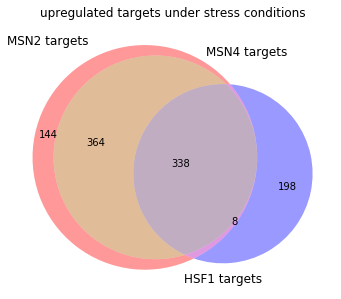

In [5]:
all = len(list(set(pos_hsf1) & set(pos_msn2) & set(pos_msn4)))

msn2_msn4 = len(list(set(pos_msn2) & set(pos_msn4))) - all 
hsf1_msn4 = len(list(set(pos_hsf1) & set(pos_msn4))) - all 
hsf1_msn2 = len(list(set(pos_hsf1) & set(pos_msn2))) - all 

hsf1 = len(pos_hsf1) - all - hsf1_msn4 - hsf1_msn2
msn2 = len(pos_msn2) - all - msn2_msn4 - hsf1_msn2
msn4 = len(pos_msn4) - all - msn2_msn4 - hsf1_msn4



# Make the diagram
v = venn3(subsets = (msn2, msn4, msn2_msn4, hsf1,hsf1_msn2, hsf1_msn4,all), set_labels = ('MSN2 targets', 'MSN4 targets', 'HSF1 targets'))
fig = plt.gcf()
fig.set_size_inches(5, 5)

plt.title("upregulated targets under stress conditions")

plt.tight_layout()
plt.show()
fig.savefig('generated_pos_targets_stress.png', dpi=100)

In [8]:
msn24_ex = list(set(pos_msn2)-set(pos_hsf1))
msn2_ex = list(set(msn24_ex) - set(pos_msn4))
hsf_ex = list(set(pos_hsf1) - set(pos_msn2))
core = list(set(pos_hsf1) & set(pos_msn2) & set(pos_msn4))

print("MSN2/4_exclusive_positive_stress_associations:",len(msn24_ex))
print("MSN2_exclusive_positive_stress_associations:",len(msn2_ex))
print("HSF1_exclusive_positive_stress_associations:",len(hsf_ex))
print("core_stress_associations:",len(core))

copyfile('./generated_yeastract.gmt', './generated_yeastract+.gmt')
with open('./generated_yeastract+.gmt', 'a') as f:
    gmt_name = "MSN2/4_exclusive_positive_stress_associations"
    gmt_id = "MSN2/4_exup"
    string = gmt_id + "\t" + gmt_name + "\t" + "\t".join(msn24_ex) + os.linesep
    f.write(string)
    
    gmt_name = "MSN2_exclusive_positive_stress_associations"
    gmt_id = "MSN2_exup"
    string = gmt_id + "\t" + gmt_name + "\t" + "\t".join(msn2_ex) + os.linesep
    f.write(string)
    
    gmt_name = "HSF1_exclusive_positive_stress_associations"
    gmt_id = "HSF1_exup"
    string = gmt_id + "\t" + gmt_name + "\t" + "\t".join(hsf_ex) + os.linesep
    f.write(string)
    
    gmt_name = "core_stress_associations"
    gmt_id = "core_exup"
    string = gmt_id + "\t" + gmt_name + "\t" + "\t".join(core) + os.linesep
    f.write(string)
            

MSN2/4_exclusive_positive_stress_associations: 508
MSN2_exclusive_positive_stress_associations: 144
HSF1_exclusive_positive_stress_associations: 198
core_stress_associations: 338
